# Let's first import  the required libraries

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#######
from numpy import isnan
from pandas import read_csv

import seaborn as sns 

# load our dataset 


In [75]:

df = pd.read_csv("/Users/yosser/Downloads/chronic_kidney_disease_full-2.csv",na_values='?') 
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


now we have to replace categorical features 

In [81]:
df['class'] = df['class'].map({'ckd':1,'notckd':0})
df['htn'] = df['htn'].map({'yes':1,'no':0})
df['dm'] = df['dm'].map({'yes':1,'no':0})
df['cad'] = df['cad'].map({'yes':1,'no':0})
df['appet'] = df['appet'].map({'good':1,'poor':0})
df['ane'] = df['ane'].map({'yes':1,'no':0})
df['pe'] = df['pe'].map({'yes':1,'no':0})
df['ba'] = df['ba'].map({'present':1,'notpresent':0})
df['pcc'] = df['pcc'].map({'present':1,'notpresent':0})
df['pc'] = df['pc'].map({'abnormal':1,'normal':0})
df['rbc'] = df['rbc'].map({'abnormal':1,'normal':0})
df['class'].value_counts()

1    250
0    150
Name: class, dtype: int64

let we visualize our dataset after data transformation : there won't be  categorical features 

In [82]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,99.0,...,38.0,6000.0,5.2,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31.0,7500.0,5.2,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.0,...,47.0,6700.0,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.0,...,54.0,7800.0,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,49.0,6600.0,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,114.0,...,51.0,7200.0,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0


corrolation matrix 

## I. Data Cleaning

## 1. Data Imputation

#### Identify the values NAN

In [77]:
df.isnull().values.any()


True

Now, let’s see the total count of null values that every feature holds

In [78]:
df.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [16]:
df.isnull().sum().sum()

1012

In [17]:
df.notnull().values.any()

True

In [18]:
df.notnull().sum().sum()

8988

In [19]:
df.isna().sum() 


age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [20]:
df.isna().sum().sum()

1012

In [21]:
df.notna().sum().sum()

8988

##  4 Strategies for Data imputation 
####       * Mean
####       * Median
####       * Most Frequent Value
####       * Constant

#### Mean strategy


In this study, the
missing numerical features were replaced by the mean

In [83]:
#One of the technique is mean imputation in which the missing values are replaced with the mean value of the entire feature column
#df.fillna(df.mean())
df['age'] = df['age'].fillna(df['age'].mode()[0])

df['bp'] = df['bp'].fillna(df['bp'].mode()[0])

df['bgr'] = df['bgr'].fillna(df['bgr'].mode()[0])

df['bu'] = df['bu'].fillna(df['bu'].mode()[0])

df['sc'] = df['sc'].fillna(df['sc'].mode()[0])

df['sod'] = df['sod'].fillna(df['sod'].mode()[0])

df['pot'] = df['pot'].fillna(df['pot'].mode()[0])

df['hemo'] = df['hemo'].fillna(df['hemo'].mode()[0])

df['pcv'] = df['pcv'].fillna(df['pcv'].mode()[0])

df['wbcc'] = df['wbcc'].fillna(df['wbcc'].mode()[0])

df['rbcc'] = df['rbcc'].fillna(df['rbcc'].mode()[0])

df





,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,99.0,...,38.0,6000.0,5.2,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31.0,7500.0,5.2,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.0,...,47.0,6700.0,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.0,...,54.0,7800.0,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,49.0,6600.0,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,114.0,...,51.0,7200.0,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0


and a mode method was applied to replace the
missing nominal features.

In [84]:
df['sg'] = df['sg'].fillna(df['sg'].mode()[0])
df
df['al'] = df['al'].fillna(df['al'].mode()[0])
df['su'] = df['su'].fillna(df['su'].mode()[0])
df['rbc'] = df['rbc'].fillna(df['rbc'].mode()[0])
df['pc'] = df['pc'].fillna(df['pc'].mode()[0])
df['pcc'] = df['pcc'].fillna(df['pcc'].mode()[0])
df['ba'] = df['ba'].fillna(df['ba'].mode()[0])

df['htn'] = df['htn'].fillna(df['htn'].mode()[0])
df['dm'] = df['dm'].fillna(df['dm'].mode()[0])
df['cad'] = df['cad'].fillna(df['cad'].mode()[0])
df['appet'] = df['appet'].fillna(df['appet'].mode()[0])
df['pe'] = df['pe'].fillna(df['pe'].mode()[0])
df['ane'] = df['ane'].fillna(df['ane'].mode()[0])

df











,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,99.0,...,38.0,6000.0,5.2,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31.0,7500.0,5.2,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.0,...,47.0,6700.0,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.0,...,54.0,7800.0,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,49.0,6600.0,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,114.0,...,51.0,7200.0,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0


In [24]:
from IPython.display import HTML
HTML(df.to_html())

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.0,36.0,1.20,135.0,3.5,15.4,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,99.0,18.0,0.80,135.0,3.5,11.3,38.0,6000.0,5.2,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.80,135.0,3.5,9.6,31.0,7500.0,5.2,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.80,111.0,2.5,11.2,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.40,135.0,3.5,11.6,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1
5,60.0,90.0,1.015,3.0,0.0,0.0,0.0,0.0,0.0,74.0,25.0,1.10,142.0,3.2,12.2,39.0,7800.0,4.4,1.0,1.0,0.0,1.0,1.0,0.0,1
6,68.0,70.0,1.010,0.0,0.0,0.0,0.0,0.0,0.0,100.0,54.0,24.00,104.0,4.0,12.4,36.0,9800.0,5.2,0.0,0.0,0.0,1.0,0.0,0.0,1
7,24.0,80.0,1.015,2.0,4.0,0.0,1.0,0.0,0.0,410.0,31.0,1.10,135.0,3.5,12.4,44.0,6900.0,5.0,0.0,1.0,0.0,1.0,1.0,0.0,1
8,52.0,100.0,1.015,3.0,0.0,0.0,1.0,1.0,0.0,138.0,60.0,1.90,135.0,3.5,10.8,33.0,9600.0,4.0,1.0,1.0,0.0,1.0,0.0,1.0,1
9,53.0,90.0,1.020,2.0,0.0,1.0,1.0,1.0,0.0,70.0,107.0,7.20,114.0,3.7,9.5,29.0,12100.0,3.7,1.0,1.0,0.0,0.0,0.0,1.0,1


assess missing values after dealing with missing values

In [25]:
df.isnull().values.any()

False

false means that there is nolonger missing values 

# first model 

first step is to seperate features from labels 

In [87]:
X= df.iloc[:,:24]
y= df['class'].values

second step is to split our data into test set and training set 

In [88]:
from sklearn.model_selection import train_test_split # Import train_test_split function
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7) # 75% training and 25% test

# naive bayes algorithm:

In [89]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_predNB = gnb.predict(X_test)
y_predNB


array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [90]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predNB))
print("Precision:",metrics.precision_score(y_test, y_predNB))
print("Recall:",metrics.recall_score(y_test, y_predNB))
print("F-measure:",metrics.f1_score(y_test, y_predNB))

Accuracy: 0.98
Precision: 1.0
Recall: 0.9672131147540983
F-measure: 0.9833333333333333


# KNN :

Text(0, 0.5, 'Erreur')

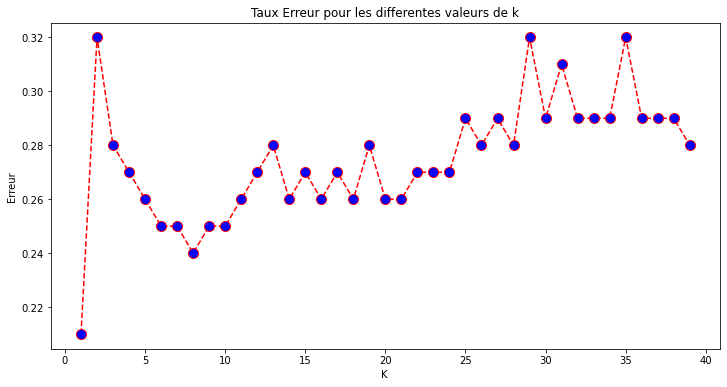

In [91]:
error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

In [92]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=1)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_predKNN = knn.predict(X_test)
y_predKNN

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [93]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predKNN))
print("Precision:",metrics.precision_score(y_test, y_predKNN))
print("Recall:",metrics.recall_score(y_test, y_predKNN))
print("F-measure:",metrics.f1_score(y_test, y_predKNN))

Accuracy: 0.79
Precision: 0.8448275862068966
Recall: 0.8032786885245902
F-measure: 0.823529411764706


# SVM:

In [94]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_predSVM = clf.predict(X_test)

In [95]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predSVM))
print("Precision:",metrics.precision_score(y_test, y_predSVM))
print("Recall:",metrics.recall_score(y_test, y_predSVM))
print("F-measure:",metrics.f1_score(y_test, y_predSVM))

Accuracy: 0.97
Precision: 0.9833333333333333
Recall: 0.9672131147540983
F-measure: 0.9752066115702478


# second model : 

Feature subset selection aims to reduce computing time and improve the results of prediction of machine learning algorithms.

In [96]:

# name of the label (can be seen in the dataframe)
label = 'class'

# list with feature names (V1, V2, V3, ...)
features = df.columns.tolist()
features


['age',
 'bp',
 'sg',
 'al',
 'su',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wbcc',
 'rbcc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'class']

In [97]:
del features[-1]
#features1=features.pop()
features

['age',
 'bp',
 'sg',
 'al',
 'su',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wbcc',
 'rbcc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane']

In [98]:
from scipy.stats import pointbiserialr
from math import sqrt

def getMerit(subset, label):
    k = len(subset)

    # average feature-class correlation
    rcf_all = []
    for feature in subset:
        coeff = pointbiserialr( df[label], df[feature] )
        rcf_all.append( abs( coeff.correlation ) )
    rcf = np.mean( rcf_all )

    # average feature-feature correlation
    corr = df[subset].corr()
    corr.values[np.tril_indices_from(corr.values)] = np.nan
    corr = abs(corr)
    rff = corr.unstack().mean()

    return (k * rcf) / sqrt(k + k * (k-1) * rff)

In [99]:
subset = ['age', 'bp', 'sg', 'al']
corr = df[subset].corr()
corr

,age,bp,sg,al
age,1.000000,0.135503,-0.161959,0.087907
bp,0.135503,1.000000,-0.166980,0.123518
sg,-0.161959,-0.166980,1.000000,-0.479962
al,0.087907,0.123518,-0.479962,1.000000


In [100]:
corr.values[np.tril_indices_from(corr.values)] = np.nan
corr

,age,bp,sg,al
age,NaN,0.135503,-0.161959,0.087907
bp,NaN,NaN,-0.166980,0.123518
sg,NaN,NaN,NaN,-0.479962
al,NaN,NaN,NaN,NaN


In [101]:
best_value = -1
best_feature = ''
for feature in features:
    coeff = pointbiserialr( df[label], df[feature] )
    abs_coeff = abs( coeff.correlation )
    if abs_coeff > best_value:
        best_value = abs_coeff
        best_feature = feature

print("Feature %s with merit %.4f"%(best_feature, best_value))

Feature sg with merit 0.6595


In [102]:
class PriorityQueue:
    def  __init__(self):
        self.queue = []

    def isEmpty(self):
        return len(self.queue) == 0
    
    def push(self, item, priority):
        """
        item already in priority queue with smaller priority:
        -> update its priority
        item already in priority queue with higher priority:
        -> do nothing
        if item not in priority queue:
        -> push it
        """
        for index, (i, p) in enumerate(self.queue):
            if (set(i) == set(item)):
                if (p >= priority):
                    break
                del self.queue[index]
                self.queue.append( (item, priority) )
                break
        else:
            self.queue.append( (item, priority) )
        
    def pop(self):
        # return item with highest priority and remove it from queue
        max_idx = 0
        for index, (i, p) in enumerate(self.queue):
            if (self.queue[max_idx][1] < p):
                max_idx = index
        (item, priority) = self.queue[max_idx]
        del self.queue[max_idx]
        return (item, priority)

In [103]:
# initialize queue
queue = PriorityQueue()

# push first tuple (subset, merit)
queue.push([best_feature], best_value)

In [104]:
# list for visited nodes
visited = []

# counter for backtracks
n_backtrack = 0

# limit of backtracks
max_backtrack = 5


In [105]:
# repeat until queue is empty
# or the maximum number of backtracks is reached
while not queue.isEmpty():
    # get element of queue with highest merit
    subset, priority = queue.pop()
    
    # check whether the priority of this subset
    # is higher than the current best subset
    if (priority < best_value):
        n_backtrack += 1
    else:
        best_value = priority
        best_subset = subset

    # goal condition
    if (n_backtrack == max_backtrack):
        break
    
    # iterate through all features and look of one can
    # increase the merit
    for feature in features:
        temp_subset = subset + [feature]
        
        # check if this subset has already been evaluated
        for node in visited:
            if (set(node) == set(temp_subset)):
                break
        # if not, ...
        else:
            # ... mark it as visited
            visited.append( temp_subset )
            # ... compute merit
            merit = getMerit(temp_subset, label)
            # and push it to the queue
            queue.push(temp_subset, merit)

In [106]:
merit

0.7988353985439064

In [107]:
temp_subset

['sg',
 'htn',
 'pcv',
 'dm',
 'al',
 'hemo',
 'wbcc',
 'sod',
 'bp',
 'appet',
 'bgr',
 'ane']

In [108]:
X = df[features].to_numpy()
X

array([[48.   , 80.   ,  1.02 , ...,  1.   ,  0.   ,  0.   ],
       [ 7.   , 50.   ,  1.02 , ...,  1.   ,  0.   ,  0.   ],
       [62.   , 80.   ,  1.01 , ...,  0.   ,  0.   ,  1.   ],
       ...,
       [12.   , 80.   ,  1.02 , ...,  1.   ,  0.   ,  0.   ],
       [17.   , 60.   ,  1.025, ...,  1.   ,  0.   ,  0.   ],
       [58.   , 80.   ,  1.025, ...,  1.   ,  0.   ,  0.   ]])

In [109]:
y = df[label].to_numpy()
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [110]:
X = df[best_subset].to_numpy()

In [111]:
X

array([[1.020e+00, 1.000e+00, 4.400e+01, ..., 7.800e+03, 1.350e+02,
        8.000e+01],
       [1.020e+00, 0.000e+00, 3.800e+01, ..., 6.000e+03, 1.350e+02,
        5.000e+01],
       [1.010e+00, 0.000e+00, 3.100e+01, ..., 7.500e+03, 1.350e+02,
        8.000e+01],
       ...,
       [1.020e+00, 0.000e+00, 4.900e+01, ..., 6.600e+03, 1.370e+02,
        8.000e+01],
       [1.025e+00, 0.000e+00, 5.100e+01, ..., 7.200e+03, 1.350e+02,
        6.000e+01],
       [1.025e+00, 0.000e+00, 5.300e+01, ..., 6.800e+03, 1.410e+02,
        8.000e+01]])

In [112]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=7)
sss.get_n_splits(X, y)

print(sss)       

for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

StratifiedShuffleSplit(n_splits=10, random_state=7, test_size=0.25,
            train_size=None)
TRAIN: [204 205 389 297 287  49  91 304  72  79  98 148 372  66 194 184  47  21
 240 393 280 320 207 113 159 231 132 324 291  18 122 191 336 176 128  81
 131 358 172 197 352 185 261 192 181 126  11 100 301 222 235 363 203 300
 398  71 282 390  88 119  61  67 244 263 394 152 157  16 313  93 239 349
  36 174 179  78 249 224 255 308 145   4 193  80 321 326 271 315 127 130
 196 246 219 198  29 103 208 169   2  12 214 331 285 359 345 396 293 221
 333  19 163 357  55  44  84  89 316 154 355 236 395 243 141  50 368 367
 387 380  62 253  38 173  94   5   3  99 251 376 138  52  90 111  68 330
  25 289 238 177 226 210 312 382 162 276  37 379 334 260 299 195 348 129
 369 211 296 167  26   0 125 108  22   7 290 229 302 307  24  65 160  46
 267 166  40 268 327 340 272 136 165 264  74 388  54  97 298 343 370 188
  73 245 364 265 341  86  20 366 344 170 309 115 147  23 374 361 110 286
 178 351 123  70 270

In [113]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_predSVM = clf.predict(X_test)

In [116]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=7)
sss.get_n_splits(X, y)

print(sss)       

for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

StratifiedShuffleSplit(n_splits=10, random_state=7, test_size=0.25,
            train_size=None)
TRAIN: [204 205 389 297 287  49  91 304  72  79  98 148 372  66 194 184  47  21
 240 393 280 320 207 113 159 231 132 324 291  18 122 191 336 176 128  81
 131 358 172 197 352 185 261 192 181 126  11 100 301 222 235 363 203 300
 398  71 282 390  88 119  61  67 244 263 394 152 157  16 313  93 239 349
  36 174 179  78 249 224 255 308 145   4 193  80 321 326 271 315 127 130
 196 246 219 198  29 103 208 169   2  12 214 331 285 359 345 396 293 221
 333  19 163 357  55  44  84  89 316 154 355 236 395 243 141  50 368 367
 387 380  62 253  38 173  94   5   3  99 251 376 138  52  90 111  68 330
  25 289 238 177 226 210 312 382 162 276  37 379 334 260 299 195 348 129
 369 211 296 167  26   0 125 108  22   7 290 229 302 307  24  65 160  46
 267 166  40 268 327 340 272 136 165 264  74 388  54  97 298 343 370 188
  73 245 364 265 341  86  20 366 344 170 309 115 147  23 374 361 110 286
 178 351 123  70 270

In [117]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predSVM))
print("Precision:",metrics.precision_score(y_test, y_predSVM))
print("Recall:",metrics.recall_score(y_test, y_predSVM))
print("F-measure:",metrics.f1_score(y_test, y_predSVM))

Accuracy: 0.95
Precision: 0.9384615384615385
Recall: 0.9838709677419355
F-measure: 0.9606299212598426


In [118]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predSVM))
print("Precision:",metrics.precision_score(y_test, y_predSVM))
print("Recall:",metrics.recall_score(y_test, y_predSVM))
print("F-measure:",metrics.f1_score(y_test, y_predSVM))


Accuracy: 0.95
Precision: 0.9384615384615385
Recall: 0.9838709677419355
F-measure: 0.9606299212598426


In [119]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_predSVM = clf.predict(X_test)

#CFS + naive bayes model 

In [120]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)


In [122]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")


[[38  0]
 [ 4 58]] : is the confusion matrix
0.96 : is the accuracy score
1.0 : is the precision score
0.9354838709677419 : is the recall score
0.9666666666666666 : is the f1 score


# CFS+ knn model 

In [123]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=20)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)


In [124]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")

[[29  9]
 [16 46]] : is the confusion matrix
0.75 : is the accuracy score
0.8363636363636363 : is the precision score
0.7419354838709677 : is the recall score
0.7863247863247863 : is the f1 score


# 3rd model:CFS+Adaboost+classification

In [144]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [145]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)


In [146]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")

[[38  0]
 [ 4 58]] : is the confusion matrix
0.96 : is the accuracy score
1.0 : is the precision score
0.9354838709677419 : is the recall score
0.9666666666666666 : is the f1 score


In [140]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=20)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [141]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")

[[29  9]
 [16 46]] : is the confusion matrix
0.75 : is the accuracy score
0.8363636363636363 : is the precision score
0.7419354838709677 : is the recall score
0.7863247863247863 : is the f1 score
